In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix


In [2]:
#import data
company = pd.read_csv('Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## Data Preprocessing

In [5]:
#encoding the categorical variables
encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = encoder.fit_transform(company['Urban'])
company['US'] = encoder.fit_transform(company['US'])

company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [6]:
#Encoding the sales column by setting values greter than mean(7.5) to 1 and less than mean to 0.
company['sales_encode']=''
company.loc[company['Sales']>7.5,'sales_encode']='1'
company.loc[company['Sales']<=7.5,'sales_encode']='0'

company.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_encode
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [7]:
company.drop('Sales',axis=1,inplace = True)

In [8]:
company['sales_encode'].value_counts()

0    202
1    198
Name: sales_encode, dtype: int64

#### The data is balanced.

In [9]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_encode
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [10]:
Y = company.iloc[:,-1]
X = company.iloc[:,0:-1]

In [11]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

## Random Forest Classification- hyperparameter tuning using Gridsearch

In [12]:
parameters = [{'n_estimators':[10, 20,100], 
              'max_depth':range(2,10),
               'max_features': [3]
             }]

clf_ran = RandomForestClassifier()
clf = GridSearchCV(clf_ran,parameters,cv=5,scoring = 'roc_auc')

In [13]:
#fitting the model
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(2, 10), 'max_features': [3],
                          'n_estimators': [10, 20, 100]}],
             scoring='roc_auc')

In [14]:
clf.best_score_

0.8827305947580646

In [15]:
clf.best_params_

{'max_depth': 7, 'max_features': 3, 'n_estimators': 100}

Since, best parameters are max_depth =9 with maximum features 3 with 100 decision trees,  we will build the final model with optimal parameter values.
The best accuracy score is 0.89

## Building Model with optimal parameters

In [16]:
clf_randf = RandomForestClassifier(n_estimators = 100, max_depth = 9,max_features = 3)

In [17]:
clf_randf.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, max_features=3)

In [18]:
y_pred = clf_randf.predict(x_test)
test_results = pd.DataFrame({'actual':y_test,'predicted':y_pred})
test_results.head()

,actual,predicted
132,1,0
390,0,0
310,1,0
3,0,1
248,0,0


## Measuring Test Acuuracy

In [19]:
roc_auc_score(y_test,y_pred)

0.7492063492063492

### Confusion Matrix

In [20]:
confusion_matrix(y_test, y_pred)

array([[34, 11],
       [ 9, 26]], dtype=int64)

### Classification Report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        45
           1       0.70      0.74      0.72        35

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



## Feature Selection

<AxesSubplot:xlabel='importance', ylabel='feature'>

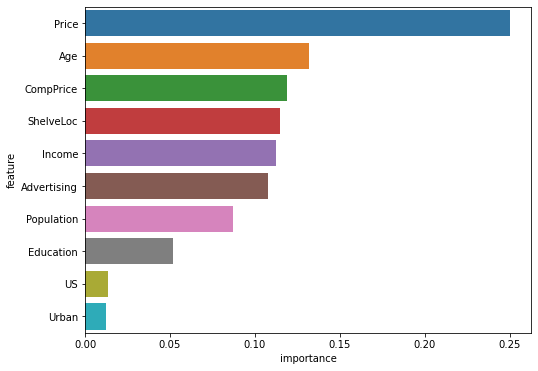

In [22]:
feature_rank = pd.DataFrame({'feature': x_train.columns,
                            'importance': clf_randf.feature_importances_})

feature_rank = feature_rank.sort_values('importance',ascending = False)
plt.figure(figsize=(8,6))
sn.barplot(y='feature',x='importance',data = feature_rank)

The top 5 important features are Price,Age,CompPrice,ShelveLoc,Advertising.

In [23]:
feature_rank.importance.cumsum()*100

4     25.023857
6     38.196030
0     50.062715
5     61.506627
1     72.722576
2     83.517707
3     92.240917
7     97.421455
9     98.764227
8    100.000000
Name: importance, dtype: float64

The top 5 features explain 73% of the data information w.r.t the target variable. The lat two features Urban and US have the least contribution,therefore they can be ignored while building the model.

## Final Conclusions

1. In the model, the training-set accuracy score is 0.88 while the test-set accuracy to be 0.77(which has improved from the decision tree model score). These two values are quite different. So, there is a possibility of overfitting. We will have to check for it and find a solution.
2. From the confusion matrix we see that it predicts both the classes but still there are type1 and type 2 errors.
3. From the classification report we see that the recall for 0 is 0.76 and for 1 it is 0.80.(This has improved from the Decision tree model.) 
4. Overall we can say that this model perfoms well in predicting the class levels.